In [2]:
# Event 1 : June 8 - June 13
import pandas as pd
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import glob
import os
from pycorenlp import StanfordCoreNLP
import matplotlib.pyplot as plt

In [3]:
june8 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june8.csv")
june9 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june9.csv")
june10 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june10.csv")
june11 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june11.csv")
june12 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june12.csv")
june13 = pd.read_csv("C:\\Users\\Afnan Anwar\\Desktop\\SPROJ\\Hate Speech\\DataSet\\Raw File\\june13.csv")
#df.astype('category')
#june8.tail()
#june9.tail()
#june10.tail()

In [5]:
frames = [june8,june9, june10, june11, june12, june13]
df = pd.concat(frames)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hate_speech
0,2020-06-08 01:34:30+00:00,1.269800e+18,1.269800e+18,"RT @LaineyGossip: In just one Spring Day, the ...",False,"[0, 140]","{'hashtags': [{'text': 'matchedamillion', 'ind...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,{'created_at': 'Mon Jun 08 01:18:43 +0000 2020...,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/tARzGt8LCh', 'expanded':...",NaN,NaN,NaN,NaN,NaN
1,2020-06-08 04:50:45+00:00,1.269850e+18,1.269850e+18,RT @GiullianaMaria: This man is the owner of F...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Fri Jun 05 00:52:52 +0000 2020...,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/7xT4FDXG5m', 'expanded':...",NaN,NaN,NaN,NaN,NaN
2,2020-06-08 15:54:06+00:00,1.270020e+18,1.270020e+18,RT @taesnokia: why is everyone silent about th...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Wed Jun 03 21:09:14 +0000 2020...,NaN,1.150000e+18,1.150000e+18,"{'url': 'https://t.co/npmkxN41Lg', 'expanded':...",NaN,NaN,NaN,NaN,NaN
3,2020-06-08 16:16:21+00:00,1.270030e+18,1.270030e+18,RT @LilNaanX: The NBA is not sinless. The orig...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Sun Jun 07 17:49:21 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-08 23:27:51+00:00,1.270140e+18,1.270140e+18,"“YERRRRRRRR .... Dominicans, Puerto Rican’s, S...",False,"[0, 180]","{'hashtags': [{'text': 'blacklivesmatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/tOMv2go5g9', 'expanded':...",{'created_at': 'Sun Jun 07 10:55:52 +0000 2020...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,2020-06-13 00:21:25+00:00,1.271599e+18,1.271599e+18,RT @mkultranews: Massive *silent* #BlackLivesM...,False,"[0, 108]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Sat Jun 13 00:04:19 +0000 2020...,"{'media': [{'id': 1271594168549142529, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,2020-06-13 09:58:50+00:00,1.271744e+18,1.271744e+18,RT @PinedoNRC: Ik sprak ex-profvoetballer Edga...,False,"[0, 139]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Fri Jun 12 19:40:20 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1505,2020-06-13 23:34:01+00:00,1.271949e+18,1.271949e+18,RT @MJMadda: The most amazing part of this Nur...,False,"[0, 140]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Fri Jun 12 05:22:33 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506,2020-06-13 23:48:26+00:00,1.271953e+18,1.271953e+18,RT @StefanSonnerhed: Absolutely disgraceful!!,False,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Fri Jun 12 15:36:01 +0000 2020...,NaN,1.271447e+18,1.271447e+18,"{'url': 'https://t.co/1Bnu5uM4YQ', 'expanded':...",NaN,NaN,NaN,NaN,NaN


In [6]:
len(df.id.unique())

5113

In [7]:
# Dropping same tweets
df.drop_duplicates(subset=["full_text"],inplace=True)
#june8.drop(axis=1,inplace=True)
df=df[df.lang == 'en']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 0 to 1503
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3472 non-null   object 
 1   id                         3472 non-null   float64
 2   id_str                     2866 non-null   float64
 3   full_text                  3472 non-null   object 
 4   truncated                  2866 non-null   object 
 5   display_text_range         2866 non-null   object 
 6   entities                   3472 non-null   object 
 7   source                     3472 non-null   object 
 8   in_reply_to_status_id      139 non-null    float64
 9   in_reply_to_status_id_str  139 non-null    float64
 10  in_reply_to_user_id        167 non-null    float64
 11  in_reply_to_user_id_str    167 non-null    float64
 12  in_reply_to_screen_name    167 non-null    object 
 13  user                       2866 non-null   objec

In [102]:
df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hate_speech,en
1486,2020-06-13 00:14:14+00:00,1.271597e+18,1.271597e+18,RT @Dani_Knope: @spacexbuns I registered. 2 fr...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eng
1487,2020-06-13 19:30:57+00:00,1.271888e+18,1.271888e+18,RT @flywithkamala: This is also why we march a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eng
1500,2020-06-13 14:43:04+00:00,1.271815e+18,1.271815e+18,RT @SholaMos1: Are Police afraid for their liv...,False,"[0, 144]","{'hashtags': [{'text': 'PritiPatel', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,1.271775e+18,1.271775e+18,"{'url': 'https://t.co/WopOaUuMqc', 'expanded':...",NaN,NaN,NaN,NaN,NaN,eng
1502,2020-06-13 21:00:39+00:00,1.271910e+18,1.271910e+18,RT @youknowit0609: #pritipatel last week Blac...,False,"[0, 140]","{'hashtags': [{'text': 'pritipatel', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eng
1503,2020-06-13 00:21:25+00:00,1.271599e+18,1.271599e+18,RT @mkultranews: Massive *silent* #BlackLivesM...,False,"[0, 108]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,"{'media': [{'id': 1271594168549142529, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eng


In [9]:

# Cleaning, StopWords, Lemmatizing tweets for topic modelling

import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

#Taking a look at the data
df = df.copy()

#Remove '@ User from the 'text' col
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)

    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

df['tidy_tweet'] = df['full_text'].apply(lambda x: remove_users(x,"@ [\w]*", "@[\w]*"))

#Normalization
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

# Remove all the hashtags from the text
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)

    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: remove_hashtags(x,"# [\w]*", "#[\w]*"))

# Remove all links & URLs
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

df['tidy_tweet'] = df['tidy_tweet'].apply(remove_links)

# Removing Punctuations, Numbers, and Special Characters
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

#Removing words with less than 3 characters
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))



In [106]:
df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,tidy_tweet
2049,2020-06-08 21:56:47+00:00,1.270110e+18,1.270110e+18,RT @BWUnitedYEG: @doniveson We listened to you...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,{'created_at': 'Mon Jun 08 21:49:17 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,listened want listening trying want significan...
2050,2020-06-08 03:54:29+00:00,1.269840e+18,1.269840e+18,RT @remygryph: DO NOT LET UP NOW. \n\nTHIS IS ...,False,"[0, 99]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,{'created_at': 'Mon Jun 08 02:40:20 +0000 2020...,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/VOpTNiywY1', 'expanded':...",NaN,NaN,NaN,NaN,this still going
2051,2020-06-08 20:58:19+00:00,1.270100e+18,1.270100e+18,RT @AbenaBakenra: how can a “missed traffic st...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,{'created_at': 'Sun Jun 07 13:26:22 +0000 2020...,NaN,1.270000e+18,1.270000e+18,"{'url': 'https://t.co/sy2XISKJxj', 'expanded':...",NaN,NaN,NaN,NaN,missed traffic stop ever warrant guns being dr...
2052,2020-06-08 04:49:27+00:00,1.269850e+18,1.269850e+18,RT @blvckcouples: It costs $0 to RT this tweet...,False,"[0, 142]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,{'created_at': 'Wed Jun 03 22:37:12 +0000 2020...,"{'media': [{'id': 1268310791096160256, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,costs this tweet help small black owned busine...
2053,2020-06-08 17:39:52+00:00,1.270050e+18,1.270050e+18,RT @latinxnow: Using your platform for good: @...,False,"[0, 140]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,{'created_at': 'Mon Jun 08 02:10:48 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,using your platform good donated million army ...


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 2054 non-null   object 
 1   id                         2054 non-null   float64
 2   id_str                     2054 non-null   float64
 3   full_text                  2054 non-null   object 
 4   truncated                  2054 non-null   bool   
 5   display_text_range         2054 non-null   object 
 6   entities                   2054 non-null   object 
 7   source                     2054 non-null   object 
 8   in_reply_to_status_id      66 non-null     float64
 9   in_reply_to_status_id_str  66 non-null     float64
 10  in_reply_to_user_id        73 non-null     float64
 11  in_reply_to_user_id_str    73 non-null     float64
 12  in_reply_to_screen_name    73 non-null     object 
 13  user                       2054 non-null   objec

In [10]:
# RQ 1- Dominant keywords associated with hate speech tweets and associated relevant attributes?
new = df[df['possibly_sensitive']== 1] # Using a data frame of only those tweets manually annotated as hate speech
new[['possibly_sensitive']]


,possibly_sensitive
608,1.0
711,1.0
739,1.0
821,1.0
966,1.0
998,1.0
1060,1.0
1321,1.0
1507,1.0
1528,1.0


In [11]:
# Keeping only the relevant columns for analysis:
new = new[['created_at','possibly_sensitive', 'tidy_tweet']]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 608 to 1450
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          32 non-null     object 
 1   possibly_sensitive  32 non-null     float64
 2   tidy_tweet          32 non-null     object 
dtypes: float64(1), object(2)
memory usage: 768.0+ bytes


In [110]:
# importing libraries for topic modelling

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.corpora import Dictionary

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

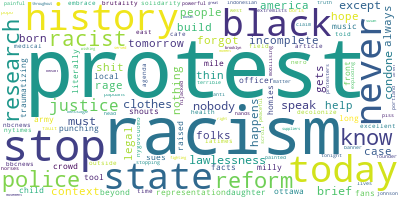

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(new['tidy_tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [113]:
# Now the next step is for us to analyze the context of the tweets using the most common topics associated with hate speech as seen in the word cloud above

In [15]:
new[new['tidy_tweet'].str.contains('protest')]

,created_at,possibly_sensitive,tidy_tweet
1507,2020-06-08 05:48:49+00:00,1.0,crowd this protest literally mile long
1001,2020-06-11 19:23:58+00:00,1.0,portland protests aren stopping
1065,2020-06-12 06:52:44+00:00,1.0,protesters claim police fault exploding head m...
1232,2020-06-12 11:54:49+00:00,1.0,boris johnson anti racism protests hijacked ex...
79,2020-06-13 17:04:57+00:00,1.0,this protests right


In [17]:
new[new['tidy_tweet'].str.contains('racism')]

,created_at,possibly_sensitive,tidy_tweet
569,2020-06-10 04:44:42+00:00,1.0,excellent article from from about racism healt...
274,2020-06-11 09:37:58+00:00,1.0,time embrace reform agenda racism
1232,2020-06-12 11:54:49+00:00,1.0,boris johnson anti racism protests hijacked ex...


In [19]:
new[new['tidy_tweet'].str.contains('black')]

,created_at,possibly_sensitive,tidy_tweet
821,2020-06-08 14:44:27+00:00,1.0,brief incomplete history black people america ...
161,2020-06-12 15:45:47+00:00,1.0,know what does mean black lives matter piss popo


In [21]:
new[new['tidy_tweet'].str.contains('state')]

,created_at,possibly_sensitive,tidy_tweet
739,2020-06-08 09:22:52+00:00,1.0,nobody should condone lawlessness except your ...
306,2020-06-12 18:19:40+00:00,1.0,west papuans hands racist indonesian state


In [23]:
new[new['tidy_tweet'].str.contains('stop')]

,created_at,possibly_sensitive,tidy_tweet
1001,2020-06-11 19:23:58+00:00,1.0,portland protests aren stopping
89,2020-06-13 11:01:01+00:00,1.0,never stop fighting justice until justice serv...
531,2020-06-13 15:34:50+00:00,1.0,stop stop


In [26]:
new[new['tidy_tweet'].str.contains('trump')]

,created_at,possibly_sensitive,tidy_tweet


In [31]:
# Calculating the overall sentiment score of the hate speech tweets specific to the event:
def text_blob_sentiment(tweet):
    return TextBlob(tweet).polarity
sentiment = new['tidy_tweet'].map(text_blob_sentiment)
sentiment.mean()

0.02522631448412699